In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string

In [2]:
!pip install wordcloud

                                              0.0/299.9 kB ? eta -:--:--
     ------------                           102.4/299.9 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 299.9/299.9 kB 3.7 MB/s eta 0:00:00


In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
df = pd.read_csv("lyrics_202505062303.csv")

In [6]:
df.head()

,musicbrainz_id,genius_lyrics,genius_url,lastfm_wiki_summary,lastfm_wiki_content
0,00b1397d-7f3e-4c59-bb42-ccd7fa17ee10,94 Contributors\nTranslations\nPolski\nEspañol...,https://genius.com/Ariana-grande-raindrops-an-...,"""Raindrops (An Angel Cried)"" (stylized in all ...","""Raindrops (An Angel Cried)"" (stylized in all ..."
1,00c9dcab-4abf-47f5-9755-c5c805b779c7,275 Contributors\nTranslations\nPortuguês\nРус...,https://genius.com/Kanye-west-through-the-wire...,"""Through the Wire"" is the lead single from Ka...","""Through the Wire"" is the lead single from Ka..."
2,012e3459-b54d-49e9-b48d-d0922d295c5a,31 Contributors\nI’ll Cry Instead Lyrics\nJohn...,https://genius.com/The-beatles-ill-cry-instead...,NaN,NaN
3,013a7fe3-0113-4604-a295-f74a0b88bf05,37 Contributors\nShe’s Always a Woman Lyrics\n...,https://genius.com/Billy-joel-shes-always-a-wo...,"""She's Always a Woman"" is a She's Always a Wom...","""She's Always a Woman"" is a She's Always a Wom..."
4,01564f1c-99b2-466a-a60d-4e22a5008525,15 Contributors\n​angel Lyrics\n[Verse 1]\nIf ...,https://genius.com/Kacey-musgraves-angel-lyrics,NaN,NaN


In [12]:
# Use the correct lyrics column
LYRICS_COL = 'genius_lyrics'

In [13]:
# Drop rows with missing lyrics
df = df.dropna(subset=[LYRICS_COL])

In [14]:
# Function to compute average sentence count and average word length
def compute_nlp_metrics(data):
    sentence_counts = data[LYRICS_COL].apply(lambda x: len(sent_tokenize(x)))
    word_lengths = data[LYRICS_COL].apply(lambda x: [len(word) for word in word_tokenize(x) if word.isalpha()])
    
    avg_sentences = sentence_counts.mean()
    avg_word_length = word_lengths.apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0).mean()
    
    return avg_sentences, avg_word_length

In [27]:
from matplotlib import cm
import numpy as np
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        stopwords=custom_stopwords,
        colormap='plasma',         # Prettier colormap: try 'plasma', 'viridis', 'magma'
        max_words=200,             # Limit to top 200 words
        contour_width=0.5,         # Add a subtle contour
        contour_color='steelblue'  # Contour color
    ).generate(text.lower())       # Lowercase for consistent filtering

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18, fontweight='bold')
    plt.show()

In [16]:
# --------- WHOLE DATASET ANALYSIS ---------
avg_sentences_all, avg_word_len_all = compute_nlp_metrics(df)
print("Entire Dataset:")
print(f"Average number of sentences per lyric: {avg_sentences_all:.2f}")
print(f"Average word length: {avg_word_len_all:.2f}")

Entire Dataset:
Average number of sentences per lyric: 6.02
Average word length: 3.88


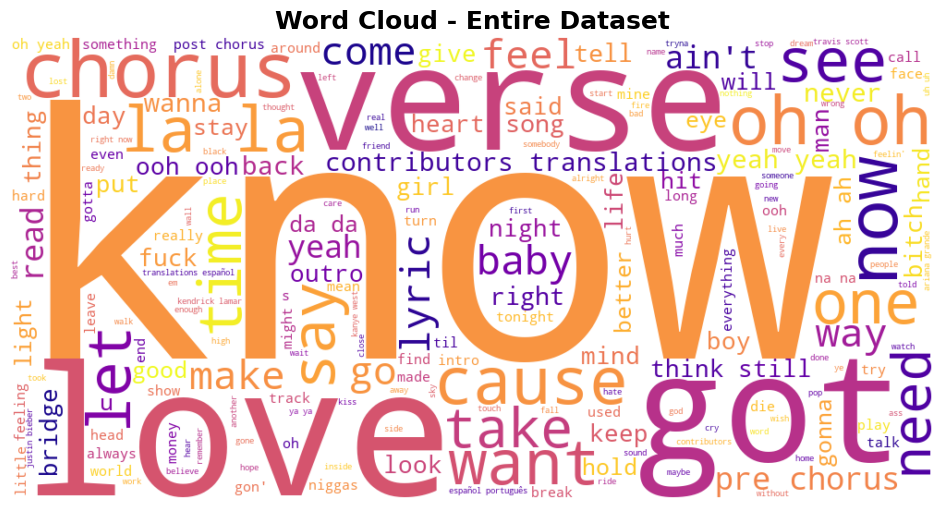

In [28]:
# Word cloud for the entire dataset
all_text = ' '.join(df[LYRICS_COL].dropna().values)
generate_wordcloud(all_text, "Word Cloud - Entire Dataset")

In [18]:
# --------- ANALYSIS FOR 3 SELECTED SONGS ---------
song_ids = [
    "a31eab71-a326-4a2e-abc0-3233a1f534e5",  # Anna go to him
    "b7b3dde7-c246-4add-9300-f6e25b1365cf",  # Memory Box
    "4abb7b36-39a8-4984-a77f-7de0e375f36b",  # Follow your Arrow
]

df_selected = df[df['musicbrainz_id'].isin(song_ids)]

avg_sentences_sel, avg_word_len_sel = compute_nlp_metrics(df_selected)
print("\nSelected Songs:")
print(f"Average number of sentences per lyric: {avg_sentences_sel:.2f}")
print(f"Average word length: {avg_word_len_sel:.2f}")


Selected Songs:
Average number of sentences per lyric: 2.00
Average word length: 3.71


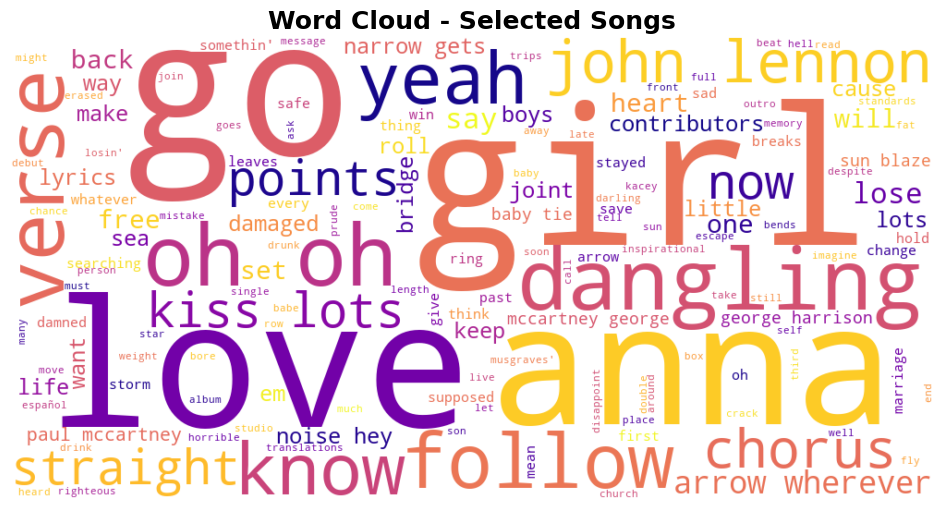

In [29]:
# Word cloud for selected songs
selected_text = ' '.join(df_selected[LYRICS_COL].dropna().values)
generate_wordcloud(selected_text, "Word Cloud - Selected Songs")